# 机器学习--1分布和有监督学习

ddddyf 开始于7/20/2024

## 前言
本文希望记录个人的学习笔记。
原意是想系统地介绍回归和分类的，但是由于想起在暑假的生存分析课堂上所遇到的各种系数的分布，觉得需要学一些正态分布之外的分布类型。
列一下三大板块要学的东西：

分布：正态分布与假设检验、t分布、weibull分布、卡方分布、伽马分布、指数分布、F分布、对数正态分布、泊松分布。

回归：1.基础：极大似然法、线性回归的四大前提条件与参数估计；2.优化：正则化、梯度下降法和全局最小值搜索；3.评估验证：参数的置信区间、线性比较系数的假设检验、似然比检验、f检验；4.模型扩展：交互项、中介效应、协变量筛选、过拟合与正则化；5.诊断和特殊情况：未观察到的异质性、数据异常值检验、非参数半参数与非线性回归。

分类：1.逻辑斯蒂回归；2.决策树；3.随机森林


## 一.分布


### 1.什么是分布

分布是基于概率产生的概念。一个随机变量可能取不同的值，我们希望了解它在取不同的值有多少的概率。一般来说，变量需要满足“独立同分布”假设。

**PDF函数(probability density function)** ：概率密度函数。对于连续型变量，取任一具体值的概率为零。

**CDF函数(cunmulative distribution function)** ：累积分布函数。$CDF(x)=\int_{-\infty}^{x}PDF(u)du$。函数值表示随机变量小于等于该值的概率。该函数亦可以计算取值落在某一范围内的概率。


### 2.正态分布

正态分布的来源：中心极限定理。假设在总体中抽取样本量为n＞30的样本，它的均值为$\bar{x}$,进行多次抽样，可以发现$\bar{x}$服从正态分布。

PDF函数: $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$。

我们可以对x进行“标准化”处理，这样把任何变量转化为一个服从同一个分布函数的变量，可以利用一个分布函数解决所有正态分布的问题。首先“中心化”，将平均值作为原点：$x_i^{\prime}=x_i-\bar{x_i}$, 除以标准差：$x_i^{\prime\prime}=\frac{x_i^{\prime}}{\sigma}$。经过这样一番操作后，新的变量均值为0，标准差为1。 称该分布为标准正态分布：

$\mu=0$, $\sigma=1$， $f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$、

**重要性质：**正态分布的线性组合仍为正态分布。

#### 代码实现：检验数据正态性

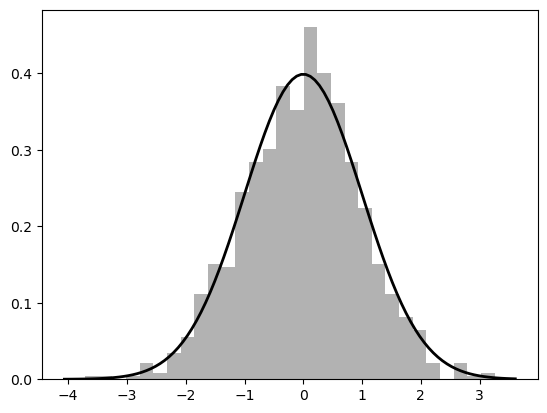

Statistics=0.999, p=0.604
样本看起来是正态分布的 (fail to reject H0)


In [1]:
#图像法
import numpy as np  
import matplotlib.pyplot as plt  
  
data = np.random.normal(loc=0, scale=1, size=1000)  # 生成正态分布的随机数据  
  
plt.hist(data, bins=30, density=True, alpha=0.6, color=['#808080'])  
xmin, xmax = plt.xlim()  
x = np.linspace(xmin, xmax, 100)  
p = np.exp(-(x - 0)**2 / 2) / np.sqrt(2 * np.pi)  
plt.plot(x, p, 'k', linewidth=2)  
plt.show()

# Shapiro-Wilk检验
from scipy import stats
  
stat, p = stats.shapiro(data)  
print('Statistics=%.3f, p=%.3f' % (stat, p))  
 
alpha = 0.05  
if p > alpha:  
    print('样本看起来是正态分布的 (fail to reject H0)')  
else:  
    print('样本不是正态分布的 (reject H0)')

### 3.假设检验

有零假设$H_0$，在该假设下，计算所构造的统计量出现的最大概率$p$，若$p$值过小(如＜0.05)，则认为该假设为小概率事件而予以拒绝;若并不太小，则认为没有充分理由拒绝假设。

一般这个统计量只有在服从某种分布时才能计算它出现的最大概率。这是我们建立多种分布模型的动机：严格地用数学的模型解释现实数据。


### 4.t分布

正态分布函数所使用的方差是总体标准差$\sigma$ ，但大多数时候我们只知道样本标准差。使用样本标准差来标准化后，统计量的分布服从t分布。 **这是t分布与正态分布的根本区别。** 但由于随着样本量的增大，s会向$\sigma$逼近，所以在n＞30(或＞45)，且不知道总体方差时，我们可以采用正态分布。而当样本量较小，且总体分布服从正态分布时，使用t分布。这时样本的大小成为一个重要变量，以**自由度** $df=n-1$衡量

t分布的PDF函数由gamma函数推出。


### 5.卡方分布

#### 卡方统计量的构建
独立随机变量：$x_1,x_2,...,x_k$服从标准正态分布$N(0,1),X = \sum_{i=1}^k x_i$，则$X$服从自由度为$k$的卡方分布$\chi^2(k)$

其中$E(X) = n, D(X) = 2n$

*卡方分布的**PDF**函数为：$f(x; k) = \frac{x^{\frac{k}{2} - 1} e^{\frac{-x}{2}}}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}$(函数$\Gamma(x)$见伽马分布)*
#### 卡方检验
$H_0$:离散型变量A与离散型变量B不存在相关关系。

列联表记录同时满足$A=A_i, B=B_i$时的频数$O_{ij}$。
构造$x_{ij} = \frac{(O_{ij}-E_{ij})^2}{E_{ij}}$，其中，$O_{ij}$为观察值，$E_{ij}$为满足$H_0$的理论值。
$X = \sum_{i=1,j=1}^{k,s} x_{ij}$，$df=(k-1)(s-1)$，则$X$满足$\chi^2(df)$，将$X$的值代入，可以获得$p$。$X越大，p越小$。若$p$小于0.05可以认为出现了小概率事件，拒绝零假设。


### 6.泊松分布

**PMF**(probability mass function):

$f(X=k)=\frac{e^{-\lambda}{\lambda^k}}{k!}, k=0,1,2,3,...$

可以检验该式满足分布律的条件：$\sum_{k=0}^{\infty}f(X=k) = e^{-\lambda}\sum_{k=0}^{\infty}\frac{\lambda^k}{k!} = e^{-\lambda}e^\lambda = 1$ 其中，第二步利用了指数函数的麦克劳林展开。

泊松分布的主要作用是近似模拟二项分布。我们知道当p值在0.5左右，n较大时，由于中心极限定理，可以用正态分布近似二项分布。但当p的值很小时，我们可以用泊松分布。令$\lambda=np$，当$\lambda$为一常数时，因为$\lim_{n\to\infty}\binom{n}{k} p^k (1-p)^{(n-k)} = \frac{\lambda^k e^{-\lambda}}{k!}$只有当$n$取极大值时等号成立，所以$p=\frac{\lambda}{n}$取极小值。即，当$p$很小，$n$很大时，可以用泊松分布模拟二项分布。(可能的标准：$n≥20$，$p≤0.05$)

可以由$\sum_{k=0}^{\infty}kf(X=k) = \lambda = np$知泊松分布近似后数学期望不变。


### 7.指数分布

泊松分布可以研究在一定时间内某一服从伯努利分布的事件发生k次的概率（假设固定时间t内发生固定的N次服从伯努利分布的事件），如果我们想研究上一个事件过时间t后发生第二次事件的概率，需要指数分布。
利用泊松过程，扩展泊松分布的分布律：

$P(X=k,t) = \frac{({\lambda}t)^k}{k!}e^{-{\lambda}t}$

由于两次事件发生间隔大于$t$的概率等于在时间$t$内没发生事件的概率：

$P(Y≥t) = P(k=0,t) = e^{-{\lambda}t}$

$\Rightarrow P(Y≤t) = 1-e^{-{\lambda}t}$

$\Rightarrow f(x) = P(Y≤t)^{\prime} = {\lambda}e^{-{\lambda}t}$

其中$f(x) = {\lambda}e^{-{\lambda}t}$就是指数分布的概率密度函数。还可以知道泊松分布的期望为$\frac{1}{\lambda}$，相当于把“单位时间里发生$\lambda$事件”等价表述为“单位事件之间隔$\frac{1}{\lambda}$事件”。

$E(X) = \frac{1}{\lambda}, D(x) = \frac{1}{{\lambda}^2}$


### 8.伽马分布

通过泊松分布和指数分布，我们分别解决了单位时间内发生k件事的概率和两件事之间时间间隔为t的概率两个问题。对后者进行拓展，对前者取逆函数得命题：在一定速率$\beta(\frac{1}{\lambda})$下，发生$\alpha$次单位事件的时间为$x$的概率。其中我们把$\alpha$称为形状参数，$\beta$为尺度参数。

若 $X{\sim}\Gamma(\alpha,\beta)$

**PDF:** $f(x; \alpha, \beta) = \frac{x^{\alpha - 1} e^{\frac{-x}{\beta}}}{\beta^{\alpha} \Gamma(\alpha)}$

其中，$\Gamma(\alpha)$为伽马函数。

#### 伽马函数
解析式：$\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} \, dt$

**性质:**

1.递推式：$\Gamma(z+1) = z\Gamma(z)$,当$z$为整数时,$\Gamma(z) = (n-1)!$.

2.欧拉反射公式：$\Gamma(z) \Gamma(1 - z) = \frac{\pi}{\sin(\pi z)}$

3.特殊值：$\Gamma(\frac{1}{2}) = \sqrt{\pi}$, $\Gamma(\frac{3}{2}) = \frac{\sqrt{\pi}}{2}$

#### 伽马分布的性质
$E(X) = {\alpha}{\beta} = \frac{\alpha}{\lambda}$, $D(X) = \alpha{\beta}^2$

当$\alpha=1$时，为指数分布；当$\alpha=\frac{n}{2},\beta=2$时，为卡方分布，其中$n$为自由度（此时$\alpha$和$\beta$不具次数和速率的含义，单纯作为两个调整形状和尺度的参数）。


### 9.F-分布

为了比较两组数据的方差的差异，我们可以利用F-分布。即如果所构造的F-统计量的$p$值小于阈值，则认为方差显著不同。

#### 为什么要比较方差
方差衡量了数据的离散情况，而离散程度越大，数据的相似性越小（即所具有的共同特征越小）。这一想法可以用于分组：如果组内的方差很小，组间的方差很大，就达到了分组的目的：把特征相似的数据集中起来，进而避免其他数据产生噪声干扰。另一方面

#### 如何比较方差
假设有两组数据$U_1,U_2$自由度分别为$d_1,d_2$，服从卡方分布，构造F-统计量：

$X = \frac{U_1/d_1}{U_2/d_2}$

则$X \sim F(d_1,d_2)$

**PDF:**$f(X, d_1, d_2) = \frac{\left(\frac{d_1 x}{d_1 x + d_2}\right)^{d_1/2} \left(\frac{d_2}{d_1 x + d_2}\right)^{d_2/2}}{x B\left(\frac{d_1}{2}, \frac{d_2}{2}\right)}, \quad x > 0$（这个函数可以由卡方分布的概率密度函数推出来），其中$\beta$ 函数$B(x_1,x_2) = \int_0^1 t^{x_1-1} (1-t)^{x_2-1} \, dt = \frac{\Gamma(x_1)\Gamma(x_2)}{\Gamma(x_1+x_2)}$

其中，当进行组间和组内比较时，$X = \frac{SSB/(k-1)}{SSW/(N-k)}$；$SSB$为组间平方差和，$SSW$为组内平方差和，$k$是分组数，$N$是总样本量。

*当对模型进行回归平方和和残差平方和的比较时，$X = \frac{SSR/k}{SSE/(n-k-1)}$；$SSR$是回归平方和，$SSE$是残差平方和，$k$是除去截距项参数的个数，$n$是样本量。(见回归部分的评估验证）*

均值：$E(X) = \frac{d_2}{d_2 - 2},d_2＞2$， 方差：$D(X) = \frac{2 \cdot (d_2^2 + d_1 \cdot d_2 - d_1^2)}{d_1 \cdot (d_2 - 2)^2 \cdot (d_2 - 4)},d_2＞4$

$n_2$的值越大，偏态越不明显，因为期望值左移。

若$Z\sim F(m,n)$，则$\frac{1}{Z}\sim F(n,m)$。
若$T\sim t(n)$，则$T^2\sim F(1,n-1)$。(因为样本均值服从正态分布，平方后服从自由度为1的卡方分布；样本方差服从自由度为n-1的卡方分布）


### 10.对数正态分布

**对数为正态分布的随机量服从对数正态分布,服从正态分布的随机量的指数服从对数正态分布。** 服从对数正态分布的统计量一定是正数。

注意：对数正态分布的PDF函数不是简单地换元为“$lnx$"，应该先对CDF函数进行换元，再对其求导。

$f(y) = \frac{1}{y \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln y - \mu)^2}{2\sigma^2} \right)$

$E(Y) = e^{\mu + \frac{\sigma^2}{2}}, D(Y) = \left(e^{\sigma^2} - 1\right)e^{2\mu + \sigma^2}$

有些数据的分布并不平衡，出现“二八定律”的情况，如居民收入，大部分人的收入集中在较低水平，有少部分人的收入非常高。此时相比正态分布，对数正态分布更能描述这类数据，从图像上看，对数正态分布右偏且有长右尾。同样，涉及“寿命”时，也可能服从这个分布：在大多数个体的寿命较短时，仍有小部分的个体寿命极长。

此外，在考虑“增长”时，每次增长都是对前一次状态的乘积运算，但有时增长率很慢，不易察觉。对增长率取指数，则能放大增长效果，同时把增长体现为加法，更为直观。此时新的表示“增长率”的统计量服从对数正态分布。


### 11.Weibull分布

指数分布衡量了时间x内发生一次事件的概率，这是相对服从伯努利分布的个体而言的；如果研究对象是一组样本，则应当表述为时间x内发生事件的个体占总体的多少百分比。注意到概率等于这个比例，所以这个量等于$CDF(x)$。

**PDF:** $f(t; \lambda, k) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-(\frac{t}{\lambda})^k}$， 
**CDF:** $F(t; \lambda, k) = 1 - e^{-(t/\lambda)^k}$

$E(X) = \lambda \Gamma\left(1 + \frac{1}{k}\right)$， 
$D(X) = \lambda^2 \left[ \Gamma\left(1 + \frac{2}{k}\right) - \left(\Gamma\left(1 + \frac{1}{k}\right)\right)^2 \right]$

其中，$\lambda$是比例参数，是$1-e^{-1}$=63.2%的样本失效时的时间。$k$是形状参数，决定失效率随时间变化的模式。$k<1$的情况下，失效率随时间减少，PDF函数单减，适用于早期失效或烧合期；$k>1$的情况下，失效率随时间增加，PDF先增后减，适用于磨损失效或老化期。值得注意的是，当$k=1$时，退化为指数分布，失效率固定。


## 二.回归

回归就是通过样本数据找到因变量与解释变量的量化关系，前提是假设两者之间存在关系，通过回归进行验证和衡量。回归的主要目的是预测结果和分析解释变量的影响。

日常生活中，我们能观察到很多经验事实。如：服用对乙酰氨基酚可以缓解发热这一现象。从化学角度可以做出因果判断，而通过数据分析可以做出相关性的判断，这是在科研中必要的补充。

## 1.回归基础

### 1.极大似然估计

极大似然估计的目的是求概率分布的参数值。考虑这样一种情况：从一个只有红球和白球的箱子里有放回地随机摸出10个球，发现里面有4个白球，试估计箱子里白球的比例。我们通常是“用样本估计总体”，直接$4\div10=\frac{2}{5}$，但这种说法没有理论支撑。显然，不是这10个球的**样本**特征决定了箱子里**总体**特征，而是**总体**决定了**样本**，这是一个因果关系。所以思路应该是假设箱子里白球的占比$\theta$，每一个$\theta$值都代表一次平行事件，我们采用“摸出4个白球”的概率最大时的$\theta$值作为估计值。为了实现这一设想，我们需要建立**似然函数**。

似然函数将观测数据固定，而将参数视为变量，评估在不同参数值下观测到这些数据的可能性。**当似然函数有最大值时，取这个$\theta$值**。在这个例子中，参数$\theta$就是箱子里白球的比例，它等于在箱子中随机取，取出白球的概率p。函数$L(p∣\frac{2}{5}) = \binom{10}{4}p^4 (1-p)^6$，经求导计算，当p在0到1之间时，p取$\frac{2}{5}$时似然函数有最大值。

考虑更一般的情况，观察到独立的服从同一个离散型分布的事件$A_1, A_2,...,A_n$，设该分布的PMF函数为$P_\theta(A)$，其中$\theta$为分布的参数，$P(A_i)=p_i$，则构造似然函数为$L(\theta∣A_1, A_2,...,A_n) = p_1*p_2*...*p_n$。这里的乘法是因为独立事件同时发生的概率等于它们发生的概率乘积。同理可以推广到连续型随机变量上，只需要把PMF换成PDF。

我们知道求线性回归方程的系数需要用最小二乘法，我们会在后面给予推导。值得注意的是这需要用到极大似然估计。

### 2.线性回归的三重前提条件

#### 线性回归方程的结构
$y_i = \beta*X_i + \varepsilon_i$。其中$y_i$是响应变量，$X_i$是解释变量，它是一个包含多个维度数据的向量，$\beta$是参数，也是一个向量。$\varepsilon_i$是误差项。误差项的存在原因可能是公式的解释变量维数少于实际造成影响的解释变量的维数（未观察到的异质性），或测量和数据收集过程中的误差。特别在公式中列出误差项是必要的，这更符合线性回归的实际情况，同时能为判断模型的拟合程度提供帮助。

#### 条件1.满秩性
样本量要大于自变量的维数。这是显然的，否则通过解线性方程的知识可以知道系数不唯一(或者说有无穷多解)，方程也自然没有意义。
#### 条件2.正态性
误差项服从正态分布。
#### 条件3.高斯-马尔可夫条件
这是对条件2的进一步补充，包括：

1.回归模型是自变量与因变量之间的线性关系。这是对方程的形式作出假设。

2.误差项**独立地**服从**期望为0**的**同方差**正态分布。其中“独立”指$Cov(\varepsilon_i,\varepsilon_j)=0$，即误差项之间没有线性关系。

3.自变量和误差项之间没有相关性，两者协方差$Cov(\varepsilon_i,X_i)=0$。也就是误差项的分布不受自变量取值的影响。这是需要注意的，因为当存在未观察到的异质性时（如数据存在分组的现象，但并未把这一特征纳入方程），不同的组的误差项服从不同的正态分布，这就违反了第2项的条件。

### 3.参数估计：从极大似然估计到最小二乘法
将用模型表示的预测值$\beta*X_i$减去观测值$y_i$，取它的平方和并令其最小，就可以得到参数$\beta$的估计，此时误差是最小的。但是，为什么是取平方，不是三次方、四次方呢？除了便于计算和去掉负数之外，我们的解释是平方符合极大似然估计。

假设$\varepsilon$服从$N(0,\sigma^2)$，则$y_i$服从$N(\beta*X_i,\sigma^2)$，$p_i = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(y_i-\beta*X_i)^2}{2\sigma^2}}$。根据我们在第一节的知识，似然方程$L(\beta∣A_1, A_2,...,A_n) = p_1*p_2*...*p_n = \Pi_{i=1}^n\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(y_i-\beta*X_i)^2}{2\sigma^2}}$，下面只需让$L$取到最小值。
取对数，可表示为$logL = A - B\Sigma_{i=1}^n(y_i-\beta*X_i)^2$，其中$B=\frac{1}{2\sigma^2}$是一个正数。要求这个函数的极大值，就要求后面那组求和式的最小值，这就是最小二乘法的产生。

#### 求参数的值
求一个函数达到最小值时自变量的取值，这在高中阶段时一个经典命题。我们不妨用导数的思想求一元线性回归的参数。

即求$f(a,b)=\Sigma_{i=1}^n(y_i-ax_i-b)^2$取最小值时a和b的取值。展开得$f(a,b)=\Sigma_{i=1}^n(x_i^2a^2+2x_iab+b^2-2x_iy_ia-2y_ib+y_i^2)$，分别对a，b求偏导并令其为零:

\begin{align}
\frac{\partial f}{\partial a} &= 2(\Sigma x_i^2a+\Sigma x_ib-\Sigma x_iy_i) = 0\\
\frac{\partial f}{\partial b} &= 2(nb+\Sigma x_ia-\Sigma y_i) = 0
\end{align}

可以求得$a = \frac{\Sigma x_iy_i-n\bar{x}\bar{y}}{\Sigma x_i^2-{\bar{x}}^2}$
，再由$Heisson$矩阵的行列式$het(H)=4ac-b^2=4n(\Sigma x_i^2-n\bar{x}^2)＞0$(柯西不等式)且$\Sigma x_i＞0$，知道该极值点为最小值点。

这是中学的方法，在多元线性回归中要把一位的数扩充到多维的向量：

$f(\beta) = Y^TY-2Y^TX\beta+\beta^TX^TX\beta$

$\frac{\partial f}{\partial \beta} = 2(-X^TY+X^TX\beta) = 0$

$X^TX\beta = X^TY$

这里，我们用线性代数表示的$\beta$的解析解：$\hat{\beta}=(X^TX)^{-1}X^TY$。这里用$\hat{\beta}$是因为这是参数的估计值，不能将其与参数本身混淆。这里，我们还要证明$\hat{\beta}$就是$\beta$的无偏估计。即$\hat{\beta}$的期望等于$\beta$。
*这里注意要用线性回归的前提：1.误差项独立地服从期望为0的同方差正态分布。2.自变量x和误差项$\varepsilon$之间没有相关性。*
$
E(\hat{\beta}) = E((X^TX)^{-1}X^TY) = E((X^TX)^{-1}X^T(X\beta+\varepsilon)) = E((X^TX)^{-1}X^TX\beta)+E((X^TX)^{-1}X^T\varepsilon) = E(\beta)+E((X^TX)^{-1}X^T)E(\varepsilon) = \beta
$

### 代码实现
下面演示在python中使用线性回归的解析解，并列出样本数据的图表。值得注意的是，sklearn内置的回归算法也是用的解析解求参数，只需要：

不用sklearn的LinearRegression函数，我们直接手搓模型。

         因变量       自变量
0   6.127731  1.097627
1   9.191963  1.430379
2   8.082243  1.205527
3   5.733055  1.089766
4   8.030181  0.847310
..       ...       ...
95  5.780743  0.366383
96  6.715668  1.173026
97  3.431095  0.040215
98  8.518108  1.657880
99  4.045652  0.009391

[100 rows x 2 columns]

回归方程: y = 4.22 + 2.97x

R^2值: 0.75


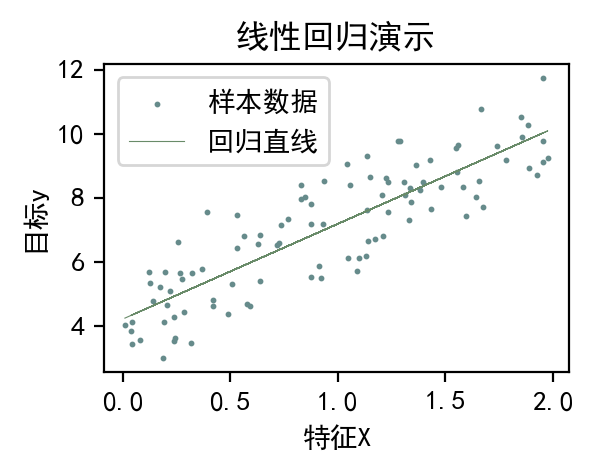

In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# 1.生成样本数据
np.random.seed(0)  
X = 2 * np.random.rand(100, 1)  # 100个样本点，特征范围从0到2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + 噪声
# 2.打印生成的样本数据
data = {'因变量':y.flatten(), '自变量':X.flatten()}
df_1 = pd.DataFrame(data)
print(df_1)
# 3.使用解析法进行线性回归
X_b = np.c_[np.ones((100, 1)), X]  # 在X前加上一列全1（截距项）
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  
# 4.提取回归系数和截距
intercept, slope = theta_best[0], theta_best[1]
print(f"\n回归方程: y = {intercept[0]:.2f} + {slope[0]:.2f}x")
# 5.计算R^2
y_pred = X_b @ theta_best
r2 = r2_score(y, y_pred)
print(f"\nR^2值: {r2:.2f}")
# 6.绘制数据点和回归直线
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示问题
plt.figure(figsize=(3,2), dpi=200)
plt.scatter(X, y, color='#668B8B', s=1.2, label='样本数据')
plt.plot(X, X_b @ theta_best, color='#698B69', linewidth=0.4, label='回归直线',antialiased=True)
plt.xlabel('特征X')
plt.ylabel('目标y')
plt.legend()
plt.title('线性回归演示')
plt.show()


## 2.优化

在求参数的值时我们并不总是用解析法，首先是当矩阵$X$为非满秩时，无法求$X^TX$的逆；其次是矩阵求逆的计算量大，在数据量很大时性能不佳。此外上面所展示的普通最小二乘法不能处理需要对数据进行加权的情况。我们需要更多的求参数方法。

### 1.加权最小二乘法

加权最小二乘法是在普通最小二乘法的基础上对数据加以权重来计算回归参数。参数的解析解为$(X^TWX)^{-1}X^TWY$，其中$W$是一个对角矩阵，对角上的元素是每个个体的权重。

在考虑采用加权最小二乘法时，第一种情况是一部分数据的来源更可靠（测量误差更小、精度更高），我们需要更重视这一部分的数据，所以给予其更大的权重。第二种情况是数据中产生了异方差性。

#### 异方差性
异方差性指误差项的方差不为常数，违反了“同方差”的假设。产生的原因之一是模型不完善，未包含应有的自变量，使得误差项随自变量变化。原因之二是数据本身有自发变异，如由于高收入群体的收入波动更大，其方差就会比中间收入的方差更大。

为了使这些方差不同的数据方差相同，我们需要对其加权。可以对每个个体加不同权重，也可以分组加权，权重都为此个体/组的方差$\sigma_i^2$的倒数。这便满足了同方差的假设；同时，由于方差越大，权重越小，降低了异常值对回归的影响。

下面这段代码会通过散点图展示具有异方差性的样本特征，并演示加权最小二乘法回归的代码。将其与普通最小二乘法进行对比，并用加权均方误差评估模型。加权均方误差(WMSE)是一种用来在有异方差性存在时衡量模型误差的统计量，其值越小越好。$WMSE = \frac{\Sigma_{i=1}^n w_i(y_i-\hat{y}_i)^2}{\Sigma_{i=1}^n w_i}$。其$R^2$更小，这是正常的。


普通回归方程: y = 2.94x + 4.229
R^2值: 0.9550
加权均方误差：0.006207

加权回归方程: y = 3.00x + 4.045
R^2值: 0.9544
加权均方误差：0.003365


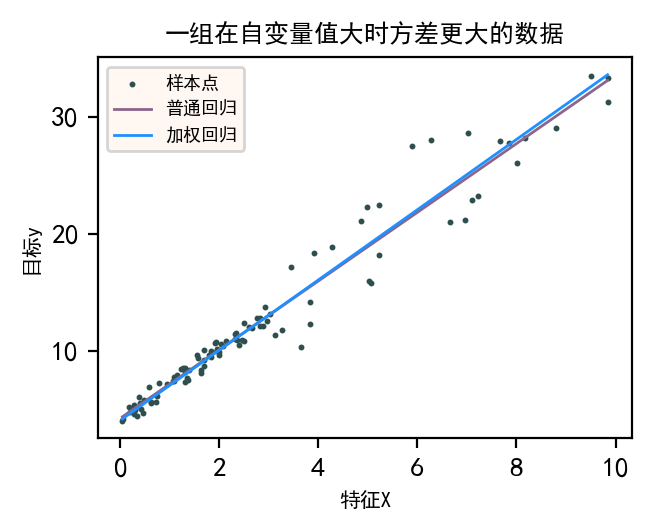

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1.生成样本数据
np.random.seed(0)
X_1 = 2 * np.random.uniform(0,1.5,70)  # 特征
X_2 = 2 * np.random.uniform(1.5,5,30)
y_1 = 4 + 3 * X_1 + np.random.randn(70)*0.5  
y_2 = 4 + 3 * X_2 + np.random.randn(30)*3
X = np.concatenate((X_1,X_2))
y = np.concatenate((y_1,y_2))
average = np.mean(y-4-3*X)
X_b = np.c_[np.ones((100, 1)), X]  # 增加截距项

# 2.计算残差的平方作为方差估计，并生成权重
residuals = (y-4-3*X-average)**2
estimated_variance = residuals
weights = 1 / (estimated_variance + 1e-8)  # 避免除零错误
W = np.diag(weights.flatten())  # 创建加权矩阵 W

# 3.普通回归
X_b = np.c_[np.ones((100, 1)), X] 
theta_best_1 = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  
b_1, k_1 = theta_best_1[0], theta_best_1[1]
print(f"\n普通回归方程: y = {k_1:.2f}x + {b_1:.3f}")
# 计算R^2
y_pred_1 = X_b @ theta_best_1
r2_1 = r2_score(y, y_pred_1)
print(f"R^2值: {r2_1:.4f}")
# 计算加权均方误差（WMSE）
errors_squared = (y - y_pred_1) ** 2  # 计算误差的平方
weighted_errors_squared = weights * errors_squared  # 计算加权后的误差平方
wmse = np.sum(weighted_errors_squared) / np.sum(weights) 
print(f'加权均方误差：{wmse:.6f}')
# 4.加权回归
X_b = np.c_[np.ones((100, 1)), X] 
theta_best_2 = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y  
b_2, k_2 = theta_best_2[0], theta_best_2[1]
print(f"\n加权回归方程: y = {k_2:.2f}x + {b_2:.3f}")
# 计算R^2
y_pred_2 = X_b @ theta_best_2
r2_2 = r2_score(y, y_pred_2)
print(f"R^2值: {r2_2:.4f}")
# 计算加权均方误差（WMSE）
errors_squared = (y - y_pred_2) ** 2  # 计算误差的平方
weighted_errors_squared = weights * errors_squared  # 计算加权后的误差平方
wmse = np.sum(weighted_errors_squared) / np.sum(weights) 
print(f'加权均方误差：{wmse:.6f}')

# 6.绘制结果
plt.figure(figsize=(6.25, 2.75), dpi=200)  # 提高清晰度
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示问题
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='#2F4F4F', label='样本点', s=1.25)
# 画回归线
x_line = np.linspace(min(X), max(X), 100)
y_line_1 = k_1 * x_line + b_1
y_line_2 = k_2 * x_line + b_2
plt.plot(x_line, y_line_1, color='#8B658B',linewidth=1, label='普通回归', antialiased=True)  # 抗锯齿
plt.plot(x_line, y_line_2, color='#1E90FF',linewidth=1, label='加权回归', antialiased=True)
plt.xlabel('特征X', fontsize=7.5)
plt.ylabel('目标y', fontsize=7.5)
plt.title('一组在自变量值大时方差更大的数据', fontsize=9)
plt.legend(fontsize=6.5, facecolor='#FFF5EE')  # 为标签栏涂上喜欢的颜色
plt.tight_layout()
plt.show()

# 私认为以上的作图代码可以作为美观的数据可视化的一个例子。

### 2.正则化

正则化可以用于处理特征矩阵不满秩的情况，更大的作用是在增强模型的泛化能力。我们这里只介绍L2正则化，更多内容在“过拟合”这一章讲。

目标函数：$J(\beta) = \frac{1}{2m}(Y-X\beta)^T(Y-X\beta)+\lambda\beta{\beta}^T$。
使这个函数值最小时，有$(X^TX+\lambda E)\beta = X^TY$。
可以看到，我们添加了一个数量矩阵。运用代数知识：$X^TX$是半正定矩阵<sup>1</sup>，$\lambda E$是正定矩阵，和就是正定矩阵，正定矩阵一定是可逆的<sup>2</sup>，即$(X^TX+\lambda E)$可逆。我们便求出了参数值。

以上只是代数的解释，下面从统计学角度讨论一下为什么要拿一个数量矩阵“冲淡”特征矩阵。当出现$X$非满秩时，意味着它有一列可以用其他列表示，由于一列代表同一个特征，也就是说某一个特征可以被其他特征表示，这种现象被称为**多重共线性**。由于一个特征可以表示为其他特征的线性回归，所以存在多重共线性的回归也学习了这个线性回归的误差项，模型无法突出样本与其背后总体的真正特征。而“冲淡”后，误差被抹平，特征还保存。所以加了一个数量矩阵。

再观察目标函数，由于同时要使前后两个项都尽可能地小，所以L2正则化会压低过大的参数，同样是避免特殊值带来的干扰。

*如果读者了解过对模型的“假设检验”，会发现有趣的一点：目标函数的前一项是在尽量学习特征，表明线性关系的显著的；后一项以“所有参数都为零”为目标，这正好与线性关系不显著的零假设一致，同样可以作为对正则化增强泛化能力的理解。*

<sup>1,2</sup>下面是对1,2的代数证明  
1.$x^T(A^TA)x = (Ax)^T(Ax)$。由于$Ax$是n列向量，$(Ax)^T(Ax)$就是n个平方的和，大于等于0。  
2.正定矩阵$A$与$E$合同，故可以表示为$A=B^TB$，其中$B$是可逆矩阵，所以$A$可逆。

### 3.最小值搜索

最小值是一个庞大的课题，几乎在数据科学、机器学习的许多领域都有应用。我们只简要介绍其概念和几种常见方法。

#### 1.最小值搜索的概念
机器学习中常常面临寻找一个函数的最小值的任务（找最大值加符号可以转化为找最小值），正如前面我们一直在寻找最小二乘法的最小值那样。这个函数有时被称为**损失函数**，均方误差$MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat{y}_i)^2$就是一种损失函数。也有代价函数，它是基于损失函数的扩展。  
最小值搜索也称为优化，分为无约束优化和有约束优化。无约束优化就是优化过程中没有任何限制条件，目标是找到最优解，使目标函数的值最小或最大。有约束优化则需要满足一定的约束条件，包括等式约束(参数必须满足某等式)和不等式约束。

#### 2.绘制二维等高线图
二变量函数是多变量函数的基础，而它正好可通过绘制等高线图来可视化。这是一个非常有趣的技巧，也会给下面的梯度下降法提供灵感。  
通过观察等高线，我们可以很快的找到极值点。虽然精度不足，但适合观察，这正是可视化的魅力。


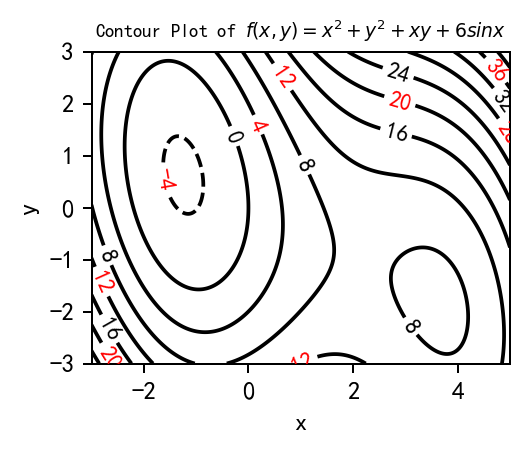

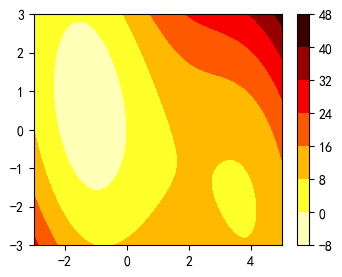

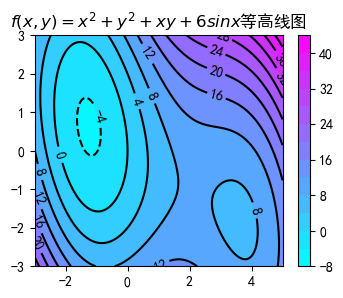

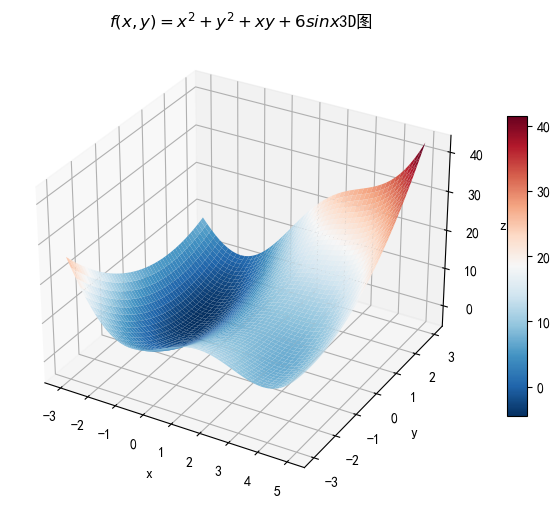

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return x**2 + y**2 + x*y + 6*np.sin(x)


# 创建网格数据
x = np.linspace(-3, 5, 1000)  # 这里决定了图示的上下限和取点个数
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 方法1.用线表示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(3, 2.25), dpi=180)
contour = plt.contour(X,Y,Z,levels=12, colors='k')  # “levels”是等高线个数
plt.clabel(contour, fontsize=9,colors=('k','r'))
plt.title('Contour Plot of $f(x, y) = x^2 + y^2 + xy + 6sinx$', fontsize=7.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 方法2.用颜色表示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(4,3))
cset = plt.contourf(X,Y,Z,6,cmap=plt.cm.hot_r) #cmap后面的代码决定了颜色，查询https://matplotlib.org/2.0.2/users/colormaps.html以了解更多
plt.colorbar(cset)
plt.show()

# 方法3.线+颜色
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(4,3))
cset = plt.contourf(X,Y,Z,12,cmap=plt.cm.cool) 
contour = plt.contour(X,Y,Z,12,colors='k')
plt.clabel(contour,fontsize=10,colors='k')
plt.colorbar(cset)
plt.title('$f(x, y) = x^2 + y^2 + xy + 6sinx$ 等高线图')
plt.show()

# 方法4.我们也可以绘制三维图，但可读性不如等高线图
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='RdBu_r', edgecolor='none')
fig.colorbar(surf, shrink=0.65, aspect=15)
ax.set_title('$f(x, y) = x^2 + y^2 + xy + 6sinx$ 3D图')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### 3.梯度下降法

关于这一方法的介绍参见https://blog.csdn.net/iqdutao/article/details/107174240

我们再补充介绍几种基本的方法和代码实现。  
**1.批量梯度下降法**

估计的参数:
[[3.20758034]
 [2.10379193]
 [6.1641782 ]
 [3.60142946]]
第20次迭代成本:1.081175
第50次迭代成本:0.520791
第100次迭代成本:0.465228
第500次迭代成本: 0.464145

用解析法算出的回归方程: y = 3.21x_1 + 2.10x_2 + 6.16x_3 + 3.60
解析法的最优成本: 0.464145


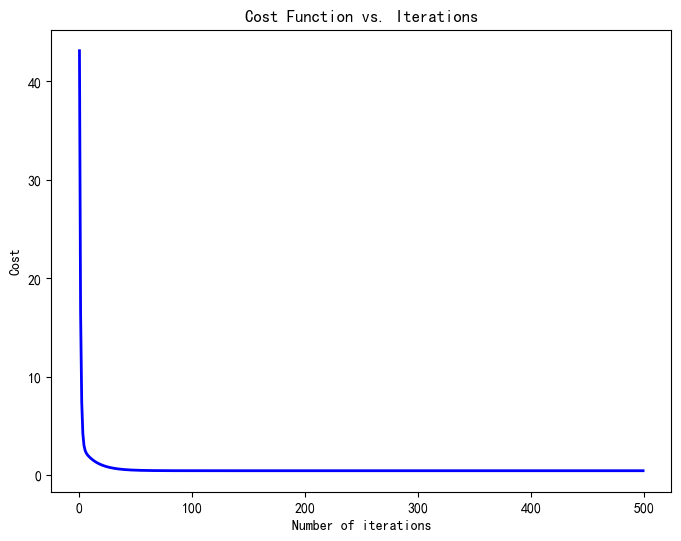

In [51]:
import numpy as np
import matplotlib.pyplot as plt


# 1. 最小二乘法目标函数
def compute_cost(X, y, theta):
    m = len(y)  # 样本数量
    predictions = X.dot(theta)  # 预测值
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))  # 计算损失
    return cost


# 2. 批量梯度下降法
def batch_gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)  # 样本数量
    cost_history = np.zeros(n_iterations)  # 用于存储每次迭代的成本
    for iteration in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)  # 计算梯度
        theta -= learning_rate * gradients  # 更新参数
        cost_history[iteration] = compute_cost(X, y, theta)  # 记录每次迭代的损失（1/2均方误差）
    return theta, cost_history

# 3. 生成数据和初始化参数
np.random.seed(42)  # 设置随机种子以确保结果可重复
X_1 = 2 * np.random.rand(100, 1) 
X_2 = 2 * np.random.rand(100, 1)
X_3 = 2 * np.random.rand(100, 1)
y = 4 + 3 * X_1 + 2*X_2 + 6*X_3 + np.random.randn(100, 1)
# 初始化参数
X_b = np.c_[np.ones((100, 1)),X_3, X_2, X_1]  # 添加偏置项（截距）
theta_initial = np.random.randn(4, 1)  # 随机初始化参数
learning_rate = 0.1  # 学习率
n_iterations = 500  # 迭代次数

# 4.执行批量梯度下降
theta_optimal, cost_history = batch_gradient_descent(X_b, y, theta_initial, learning_rate, n_iterations)
print(f'估计的参数:\n{theta_optimal[::-1]}') #倒序是为了先输出斜率
print(f'第20次迭代成本:{cost_history[19]:.6f}')
print(f'第50次迭代成本:{cost_history[49]:.6f}')
print(f'第100次迭代成本:{cost_history[99]:.6f}')
print(f'第500次迭代成本: {cost_history[-1]:.6f}')

# 5.解析法验证
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  
intercept, slope_3, slope_2, slope_1 = theta_best[0], theta_best[1], theta_best[2], theta_best[3]
print(f"\n用解析法算出的回归方程: y = {slope_1[0]:.2f}x_1 + {slope_2[0]:.2f}x_2 + {slope_3[0]:.2f}x_3 + {intercept[0]:.2f}")
cost = compute_cost(X_b, y, theta_best)
print(f'解析法的最优成本: {cost:.6f}')

# 绘制成本函数变化
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), cost_history, 'b-', linewidth=2)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()


Optimized parameters: k = 2.9684675107010188, b = 4.22215107744723
Final cost: 0.4962193243623241
          k         b      cost
0  5.569644  2.288932  0.821447
1  4.935205  1.892347  0.735090
2  5.209266  2.473497  0.671667
3  4.742097  2.179855  0.625086
4  4.945278  2.607952  0.590874
5  4.601272  2.390540  0.565747
6  4.751896  2.705898  0.547291
7  4.498580  2.544932  0.533735
8  4.610235  2.777244  0.523777
9  4.423697  2.658074  0.516463
           k         b      cost
0   5.569644  2.288932  0.821447
3   4.742097  2.179855  0.625086
6   4.751896  2.705898  0.547291
9   4.423697  2.658074  0.516463
12  4.430437  2.867061  0.504245
15  4.300250  2.846282  0.499402
18  4.304055  2.929324  0.497482
21  4.252404  2.920363  0.496720
24  4.254362  2.953366  0.496418
27  4.233866  2.949526  0.496298
30  4.234820  2.962645  0.496251
33  4.226686  2.961008  0.496232
36  4.227135  2.966224  0.496224
39  4.223906  2.965529  0.496221
42  4.224112  2.967603  0.496220


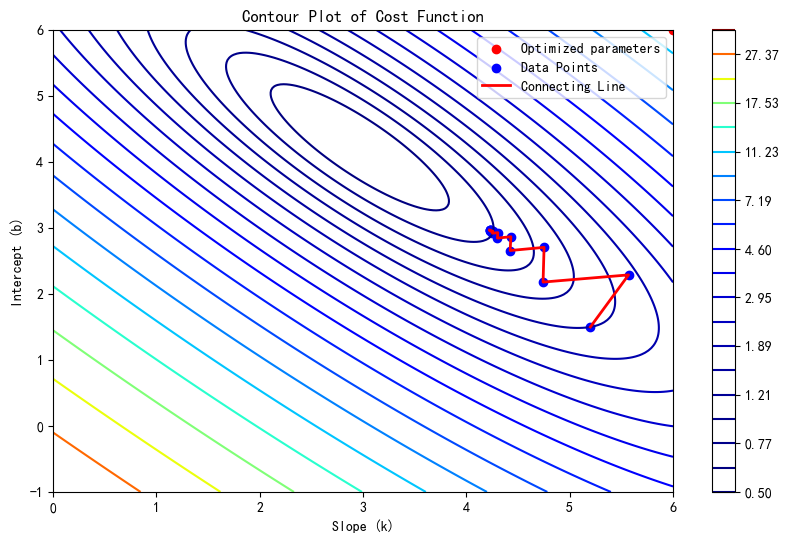

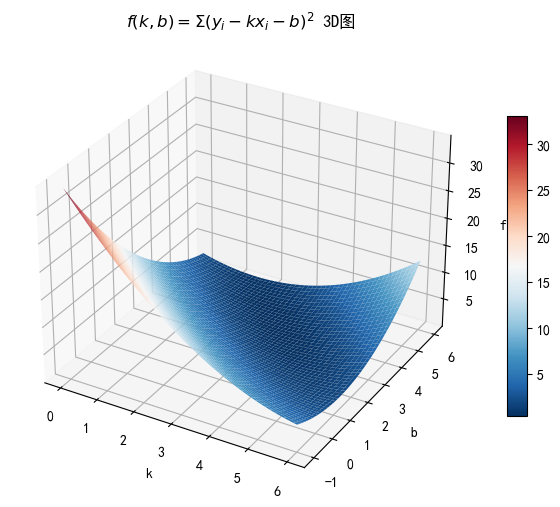

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 生成样本
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#  损失函数
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost


# 批量梯度下降法
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append({'k': theta[0, 0], 'b': theta[1, 0], 'cost': cost})
        
    return theta, cost_history


X_b = np.c_[np.ones((100, 1)), X]
initial_theta = [[5.2],[1.5]]
learning_rate = 0.9
iterations = 1000
# 执行梯度下降
theta, cost_history = gradient_descent(X_b, y, initial_theta, learning_rate, iterations)

print(f'Optimized parameters: k = {theta[1, 0]}, b = {theta[0, 0]}')
print(f'Final cost: {cost_history[-1]["cost"]}')

# 将损失函数值和参数值记录到 DataFrame 中
df = pd.DataFrame(cost_history)
print(df.head(10))

k = 3 #步长为2
n = 15 #取15组
indices = range(0, k * n, k)
s_df = df.iloc[indices]
print(s_df)
kl = s_df['k'].tolist()
bl = s_df['b'].tolist()
kl.insert(0,5.2)
bl.insert(0,1.5)


# 计算并绘制目标函数的等高线图
k_values = np.linspace(0, 6, 200)
b_values = np.linspace(-1, 6, 200)
K, B = np.meshgrid(k_values, b_values)
costs = np.zeros(K.shape)

for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        theta = np.array([[B[i, j]], [K[i, j]]])
        costs[i, j] = compute_cost(X_b, y, theta)

plt.figure(figsize=(10, 6))
contour = plt.contour(K, B, costs, levels=np.logspace(np.log10(costs.min()), np.log10(costs.max()), 20), cmap='jet')
plt.colorbar(contour)
plt.scatter(theta[1, 0], theta[0, 0], color='red', label='Optimized parameters')
plt.xlabel('Slope (k)')
plt.ylabel('Intercept (b)')
plt.title('Contour Plot of Cost Function')
plt.scatter(kl, bl, color='blue', label='Data Points')
plt.plot(kl, bl, color='red', linestyle='-', linewidth=2, label='Connecting Line')
plt.legend()
plt.show()


from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, B, costs, cmap='RdBu_r', edgecolor='none')
fig.colorbar(surf, shrink=0.65, aspect=15)
ax.set_title('$f(k, b) = \Sigma(y_i-kx_i-b)^2$ 3D图')
ax.set_xlabel('k')
ax.set_ylabel('b')
ax.set_zlabel('f')
plt.show()